In [397]:
%matplotlib inline
import numpy as np
from collections import defaultdict
import sys
import pandas as pd
import networkx as nx
import random
import matplotlib.pyplot as plt
import pickle
from nltk.tokenize import MWETokenizer
from scipy import stats
from collections import Counter
import json
import statsmodels.api as sm
import itertools
from itertools import chain
from collections import Counter
def flushPrint(www):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % www)
    sys.stdout.flush()
    


In [398]:

data_2020 = pd.read_csv(r'C:\Users\aalha\Info_Viz\Project\2020_US_Region_Mobility_Report_Processed.csv', index_col=0, parse_dates=True)
data_2021 = pd.read_csv(r'C:\Users\aalha\Info_Viz\Project\2021_US_Region_Mobility_Report_Processed.csv', index_col=0, parse_dates=True)
data_2022 = pd.read_csv(r'C:\Users\aalha\Info_Viz\Project\2022_US_Region_Mobility_Report_Processed.csv', index_col=0, parse_dates=True)
data_2022_predicted = pd.read_csv(r'C:\Users\aalha\Info_Viz\Project\Pre_only_states_3_considered_X.csv', parse_dates=True)

In [399]:
df_2020 = pd.DataFrame(data_2020)
start_date = '3/1/2020'
end_date = '8/1/2020'
# Select DataFrame rows between two dates
mask_2020 = (data_2020 ['date'] > start_date) & (data_2020 ['date'] <= end_date)
df2_2020 = data_2020.loc[mask_2020]
#df2= pd.date_range(start_date, end_date, freq='W')
#print(df2_2020)


df_2021 = pd.DataFrame(data_2021)
start_date = '3/1/2021'
end_date = '8/1/2021'
# Select DataFrame rows between two dates
mask_2021 = (data_2021 ['date'] > start_date) & (data_2021 ['date'] <= end_date)
df2_2021 = data_2021.loc[mask_2021]
#df2= pd.date_range(start_date, end_date, freq='W')
#print(df2_2021)

df_2022 = pd.DataFrame(data_2022)
start_date = '3/1/2022'
end_date = '8/1/2022'
# Select DataFrame rows between two dates
mask_2022 = (data_2022 ['date'] > start_date) & (data_2022 ['date'] <= end_date)
df2_2022 = data_2022.loc[mask_2022]
#df2= pd.date_range(start_date, end_date, freq='W')
#print(df2_2022)




df_2022_predicted = pd.DataFrame(data_2022_predicted)
start_date = '3/1/2022'
end_date = '8/1/2022'
# Select DataFrame rows between two dates
mask_2022_predicted = (data_2022_predicted ['date'] > start_date) & (data_2022_predicted ['date'] <= end_date)
df2_2022_predicted = data_2022_predicted.loc[mask_2022_predicted]
#df2= pd.date_range(start_date, end_date, freq='W')
print(df2_2022_predicted)


       sub_region_1      date  workplaces_percent_change_from_baseline  \
3642     California  3/2/2022                                      -40   
3643     California  3/2/2022                                      -32   
3644     California  3/2/2022                                      -26   
3645     California  3/2/2022                                      -20   
3646     California  3/2/2022                                      -16   
...             ...       ...                                      ...   
12360  Pennsylvania  8/1/2022                                      -39   
12361  Pennsylvania  8/1/2022                                      -25   
12362  Pennsylvania  8/1/2022                                      -26   
12363  Pennsylvania  8/1/2022                                      -24   
12364       Wyoming  8/1/2022                                      -21   

       Predicted  
3642  -36.495774  
3643  -25.565886  
3644  -30.655828  
3645  -21.424666  
3646  -23.569012

C:\Users\aalha\anaconda3\lib\site-packages\ipykernel_launcher.py:88: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\aalha\anaconda3\lib\site-packages\ipykernel_launcher.py:104: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\aalha\anaconda3\lib\site-packages\ipykernel_launcher.py:116: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\aalha\anaconda3\lib\site-packages\ipykernel_launcher.py:130: UserWarning: FixedFormatter should only be used together with FixedLocator


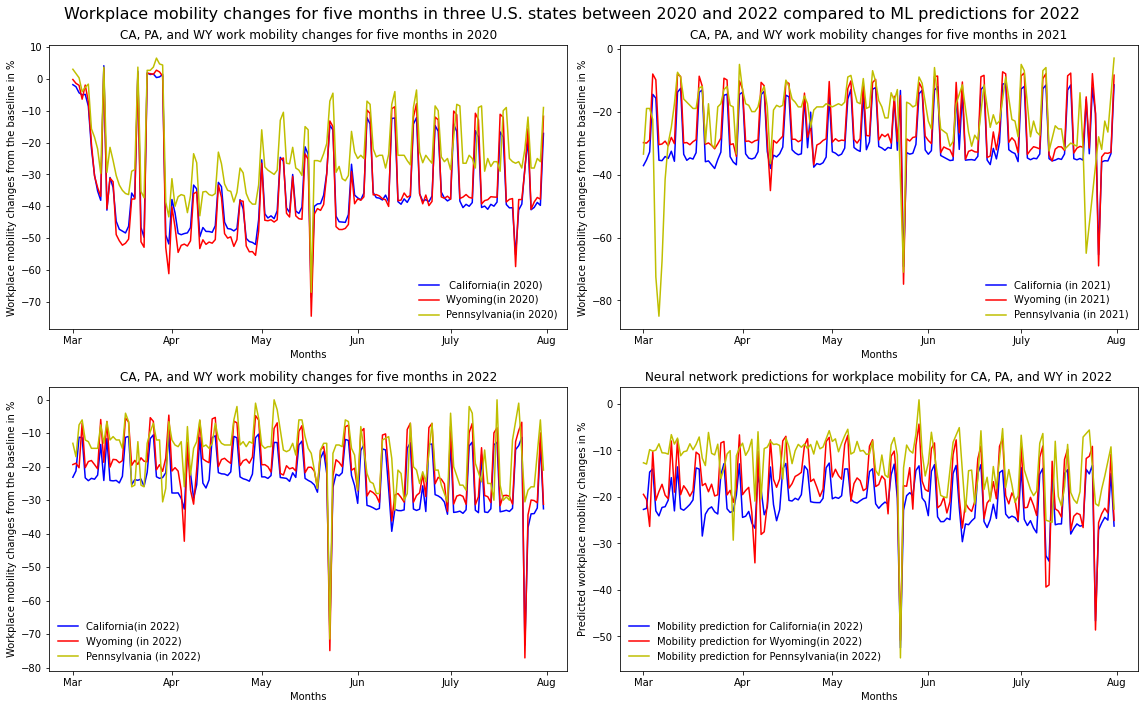

In [400]:

from sklearn import preprocessing
#data=data[0:20000]
#alabama= data[data['sub_region_1'] == 'Alabama']
#alabama

#dates= ['Feb', 'Mar', 'Apr','May', 'Jun', 'July', 'Aug']
#= df2[df2['sub_region_1'] == 'Taxes']
#ny= df2[df2['sub_region_1'] == 'New York']
#fl= df2[df2['sub_region_1'] == 'Florida']

month_names = ['Mar','Apr','May','Jun','July', 'Aug']
#month_names = [] 
month_starts = [0,32,61,92,122,153]
#y_scale=[10, 0, -20,-40,-60,-80 ]


ca_2020= df2_2020[df2_2020['sub_region_1'] == 'California']
wy_2020= df2_2020[df2_2020['sub_region_1'] == 'Wyoming']
pa_2020= df2_2020[df2_2020['sub_region_1'] == 'Pennsylvania']

ca_2021= df2_2021[df2_2021['sub_region_1'] == 'California']
wy_2021= df2_2021[df2_2021['sub_region_1'] == 'Wyoming']
pa_2021= df2_2021[df2_2021['sub_region_1'] == 'Pennsylvania']

ca_2022= df2_2022[df2_2022['sub_region_1'] == 'California']
wy_2022= df2_2022[df2_2022['sub_region_1'] == 'Wyoming']
pa_2022= df2_2022[df2_2022['sub_region_1'] == 'Pennsylvania']


ca_2022_predicted= df2_2022_predicted[df2_2022_predicted['sub_region_1'] == 'California']
wy_2022_predicted= df2_2022_predicted[df2_2022_predicted['sub_region_1'] == 'Wyoming']
pa_2022_predicted= df2_2022_predicted[df2_2022_predicted['sub_region_1'] == 'Pennsylvania']



fig, ax = plt.subplots(figsize = (16,10))

weeks= pd.date_range(start_date, end_date, freq='W')


#x_ala= ala['date']
#y_ala= ala['workplaces_percent_change_from_baseline']
#y= data['workplaces_percent_change_from_baseline']
#x=data['date']
#m= ['California', 'Taxes', 'New York', 'Florida','Pennsylvania'  ]
x_ca_2020= ca_2020['date'].unique()
y_ca_2020= ca_2020.groupby(ca_2020['date'])['workplaces_percent_change_from_baseline'].mean()
x_wy_2020= wy_2020['date'].unique()
y_wy_2020= wy_2020.groupby(wy_2020['date'])['workplaces_percent_change_from_baseline'].mean()
x_pa_2020= pa_2020['date'].unique()
y_pa_2020= pa_2020.groupby(pa_2020['date'])['workplaces_percent_change_from_baseline'].mean()

x_ca_2021= ca_2021['date'].unique()
y_ca_2021= ca_2021.groupby(ca_2021['date'])['workplaces_percent_change_from_baseline'].mean()
x_wy_2021= wy_2021['date'].unique()
y_wy_2021= wy_2021.groupby(wy_2021['date'])['workplaces_percent_change_from_baseline'].mean()
x_pa_2021= pa_2021['date'].unique()
y_pa_2021= pa_2021.groupby(pa_2021['date'])['workplaces_percent_change_from_baseline'].mean()


x_ca_2022= ca_2022['date'].unique()
y_ca_2022= ca_2022.groupby(ca_2022['date'])['workplaces_percent_change_from_baseline'].mean()
x_wy_2022= wy_2022['date'].unique()
y_wy_2022= wy_2022.groupby(wy_2022['date'])['workplaces_percent_change_from_baseline'].mean()
x_pa_2022= pa_2022['date'].unique()
y_pa_2022= pa_2022.groupby(pa_2022['date'])['workplaces_percent_change_from_baseline'].mean()


x_ca_2022_predicted= ca_2022_predicted['date'].unique()
y_ca_2022_predicted= ca_2022_predicted.groupby(ca_2022_predicted['date'])['Predicted'].mean()
x_wy_2022_predicted= wy_2022_predicted['date'].unique()
y_wy_2022_predicted= wy_2022_predicted.groupby(wy_2022_predicted['date'])['Predicted'].mean()
x_pa_2022_predicted= pa_2022_predicted['date'].unique()
y_pa_2022_predicted= pa_2022_predicted.groupby(pa_2022_predicted['date'])['Predicted'].mean()

ax=plt.subplot(2,2,1)
#plt.plot(x_ca_2020[::], y_ca_2020[::], x_wy_2020[::], y_wy_2020[::], x_pa_2020[::],y_pa_2020[::] )

plt.plot(x_ca_2020[::], y_ca_2020,'b', label=" California(in 2020)")
plt.plot(x_pa_2020[::],y_pa_2020[::], 'r' , label='Wyoming(in 2020)' )
plt.plot(x_wy_2020[::], y_wy_2020[::], 'y',label="Pennsylvania(in 2020)")
plt.legend(loc='lower right', frameon=False)
#plt.plot(x_pa[::30][1],y_pa[::30][1]   )
#ax.set_xlim(1, 10)
ax.set_ylabel("Workplace mobility changes from the baseline in %")
ax.set_xlabel("Months")
ax.set_title('CA, PA, and WY work mobility changes for five months in 2020')
ax.set_xticklabels(month_names)
ax.set_xticks(month_starts)
plt.tight_layout()


ax=plt.subplot(2,2,2)
ax.set_ylabel("Workplace mobility changes from the baseline in %")
ax.set_xlabel("Months")
ax.set_title('CA, PA, and WY work mobility changes for five months in 2021')
#plt.legend(loc=2,frameon=False)
#plt.plot(x_ca_2021[::], y_ca_2021[::], x_wy_2021[::], y_wy_2021[::], x_pa_2021[::],y_pa_2021[::] )

plt.plot(x_ca_2021[::], y_ca_2021,'b', label="California (in 2021)")
plt.plot(x_pa_2021[::],y_pa_2021[::], 'r' , label='Wyoming (in 2021)' )
plt.plot(x_wy_2021[::], y_wy_2021[::], 'y',label="Pennsylvania (in 2021)")
plt.legend(loc='lower right' , frameon=False)
ax.set_xticklabels(month_names)
ax.set_xticks(month_starts)
plt.tight_layout()
ax=plt.subplot(2,2,3)
ax.set_ylabel("Workplace mobility changes from the baseline in %")
ax.set_title("CA, PA, and WY work mobility changes for five months in 2022")
ax.set_xlabel("Months")
#plt.plot(x_ca_2022[::], y_ca_2022[::], x_wy_2022[::], y_wy_2022[::], x_pa_2022[::],y_pa_2022[::] )
plt.plot(x_ca_2022[::], y_ca_2022,'b', label="California(in 2022)")
plt.plot(x_pa_2022[::],y_pa_2022[::], 'r' , label='Wyoming (in 2022)' )
plt.plot(x_wy_2022[::], y_wy_2022[::], 'y',label="Pennsylvania (in 2022)")
plt.legend(loc='lower left', frameon=False)
ax.set_xticklabels(month_names)
ax.set_xticks(month_starts)
plt.tight_layout()

ax=plt.subplot(2,2,4)
#plt.plot(x_pa[::30][1],y_pa[::30][1]   )
#ax.set_xlim(5, 10)
ax.set_ylabel("Predicted workplace mobility changes in %")
ax.set_title("Neural network predictions for workplace mobility for CA, PA, and WY in 2022")
ax.set_xlabel("Months")
plt.plot(x_ca_2022_predicted[::], y_ca_2022_predicted[::],'b', label="Mobility prediction for California(in 2022)")
plt.plot(x_pa_2022_predicted[::],y_pa_2022_predicted[::], 'r' , label='Mobility prediction for Wyoming(in 2022)' )
plt.plot(x_wy_2022_predicted[::], y_wy_2022_predicted[::], 'y',label="Mobility prediction for Pennsylvania(in 2022)")

ax.set_xticklabels(month_names)
ax.set_xticks(month_starts)
plt.legend(loc='lower left', frameon=False)
#ax.set_yticks(y_scale)
fig.suptitle("Workplace mobility changes for five months in three U.S. states between 2020 and 2022 compared to ML predictions for 2022", fontsize=16)
plt.tight_layout()


C:\Users\aalha\anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\aalha\anaconda3\lib\site-packages\ipykernel_launcher.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\aalha\anaconda3\lib\site-packages\ipykernel_launcher.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\aalha\anaconda3\lib\site-packages\ipykernel_launcher.py:113: UserWarning: FixedFormatter should only be used together with FixedLocator


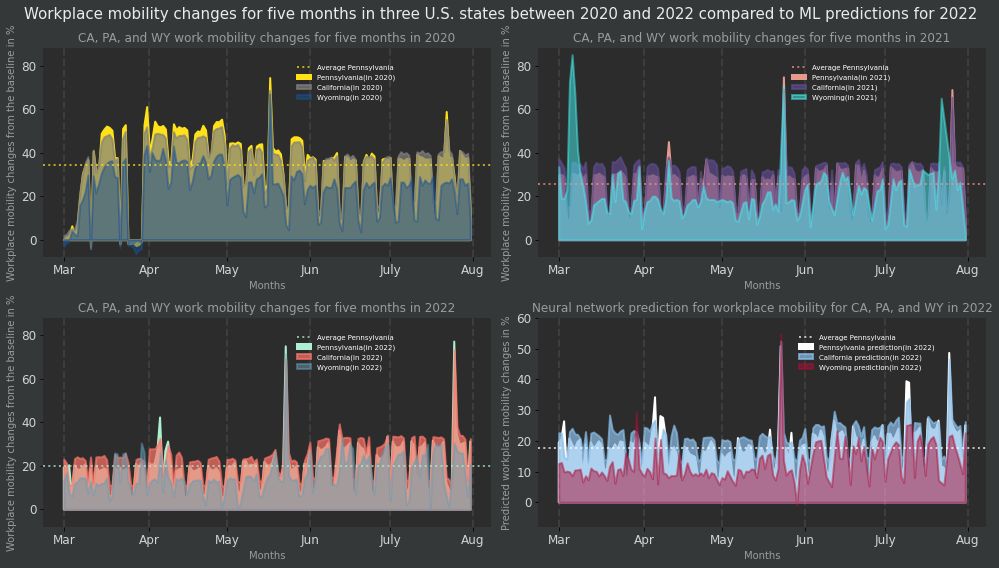

In [401]:
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

states = ['California','Wyoming','Pennsylvania']
colors= ['#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']

fig, ax = plt.subplots(1, figsize=(14,8), facecolor='#353839') 
ax=plt.subplot(2,2,1)

ax.set_facecolor('#2C2C2C')

ax.set_ylabel("Workplace mobility changes from the baseline in %", color='w', alpha=0.5)
ax.set_xlabel("Months",color='w', alpha=0.5)
ax.set_title('CA, PA, and WY work mobility changes for five months in 2020',color='w', alpha=0.5)
plt.fill_between(x_pa_2020,  y_pa_2020*-1,edgecolor='w',lw=2, color=colors[1] ,label="Pennsylvania(in 2020)" ,alpha=1)#, hatch='|')
plt.fill_between(x_ca_2020,  y_ca_2020*-1,edgecolor='w',lw=2, color='#808080' ,label='California(in 2020)' ,alpha=0.7)
#plt.fill_between(df2.x, y1, y1+df2[c], edgecolor='w', lw=0, color='b')
plt.fill_between(x_wy_2020,  y_wy_2020*-1,edgecolor='w',lw=2, color='#195190FF' ,label='Wyoming(in 2020)' ,alpha=0.5)

plt.axhline(y=np.nanmean(y_pa_2020*-1), color=colors[1], linestyle='dotted', linewidth=2,alpha=0.7, label='Average Pennsylvania')
#plt.fill_between(x_wy_2020,  y_wy_2020*-0.01,label='Wyoming(in 2020)' ,alpha=0.4)
#plt.fill_between(x_pa_2020,  y_pa_2020*-0.01,label="Pennsylvania(in 2020)",alpha=0.4)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_axisbelow(True)
ax.xaxis.grid(color='lightgrey', linestyle='dashed', alpha=0.1, lw=2)
ax.set_facecolor('#2C2C2C')
ax.set_xticklabels(month_names)
ax.set_xticks(month_starts)
plt.xticks(color='lightgrey', fontsize=12)
#ax.yaxis.grid(color='grey', linestyle='dashed', alpha=0.1, lw=3)
ax.set_ylim(-8,88)
plt.yticks(color='lightgrey', fontsize=12)
plt.legend(loc='upper right', frameon=False, fontsize=7, labelcolor='#ffffff', bbox_to_anchor=(0.8, 0.95)) # bbox_to_anchor=(0.559, 0.95))
ax=plt.subplot(2,2,2)
ax.set_ylabel("Workplace mobility changes from the baseline in %",color='w', alpha=0.5)
ax.set_xlabel("Months", color='w', alpha=0.5)
ax.set_title('CA, PA, and WY work mobility changes for five months in 2021',color='w', alpha=0.5)
ax.set_facecolor('#2C2C2C')
plt.fill_between(x_pa_2021,  y_pa_2021*-1,edgecolor='w',lw=2, color='#E69A8DFF' ,label="Pennsylvania(in 2021)" ,alpha=1)#, hatch='|')
plt.fill_between(x_ca_2021,  y_ca_2021*-1,edgecolor='w',lw=2, color='#5F4B8BFF' ,label='California(in 2021)' ,alpha=0.7)
#plt.fill_between(df2.x, y1, y1+df2[c], edgecolor='w', lw=0, color='b')
plt.fill_between(x_wy_2021,  y_wy_2021*-1,edgecolor='w',lw=2, color=colors[5] ,label='Wyoming(in 2021)' ,alpha=0.5)
plt.axhline(y=np.nanmean(y_pa_2021*-1), color='#E69A8DFF', linestyle='dotted', linewidth=2,alpha=0.7, label='Average Pennsylvania')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_axisbelow(True)
ax.xaxis.grid(color='lightgrey', linestyle='dashed', alpha=0.1, lw=2)
ax.set_facecolor('#2C2C2C')
ax.set_xticklabels(month_names)
ax.set_xticks(month_starts)
plt.xticks(color='lightgrey', fontsize=12)
plt.yticks(color='lightgrey', fontsize=12)
plt.legend(loc='upper right', frameon=False, fontsize=7, labelcolor='#ffffff', bbox_to_anchor=(0.8, 0.95))
ax.set_ylim(-8,88)

ax=plt.subplot(2,2,3)
ax.set_ylabel("Workplace mobility changes from the baseline in %",color='w', alpha=0.5)
ax.set_title("CA, PA, and WY work mobility changes for five months in 2022",color='w', alpha=0.5)
ax.set_xlabel("Months",color='w', alpha=0.5)

plt.fill_between(x_pa_2022,  y_pa_2022*-1,edgecolor='w',lw=2, color='#ADEFD1FF' ,label="Pennsylvania(in 2022)" ,alpha=1, hatch='|')
plt.fill_between(x_ca_2022,  y_ca_2022*-1,edgecolor='w',lw=2, color='#FC766AFF' ,label='California(in 2022)' ,alpha=0.7)
#plt.fill_between(df2.x, y1, y1+df2[c], edgecolor='w', lw=0, color='b')
plt.fill_between(x_wy_2022,  y_wy_2022*-1,edgecolor='w',lw=2, color='#669DB3FF' ,label='Wyoming(in 2022)' ,alpha=0.5)

plt.axhline(y=np.nanmean(y_pa_2022*-1), color='#ADEFD1FF', linestyle='dotted', linewidth=2,alpha=0.7, label='Average Pennsylvania')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_axisbelow(True)
ax.xaxis.grid(color='lightgrey', linestyle='dashed', alpha=0.1, lw=2)
ax.set_facecolor('#2C2C2C')
ax.set_xticklabels(month_names)
ax.set_xticks(month_starts)
plt.xticks(color='lightgrey', fontsize=12)
#ax.yaxis.grid(color='grey', linestyle='dashed', alpha=0.1, lw=3)

plt.yticks(color='lightgrey', fontsize=12)

plt.legend(loc='upper right', frameon=False, fontsize=7, labelcolor='#ffffff', bbox_to_anchor=(0.8, 0.95))# bbox_to_anchor=(0.559, 0.95))

ax.set_ylim(-8,88)
ax=plt.subplot(2,2,4)

ax.set_ylabel("Predicted workplace mobility changes in %",color='w', alpha=0.5)
ax.set_title("Neural network prediction for workplace mobility for CA, PA, and WY in 2022",color='w', alpha=0.5)
ax.set_xlabel("Months", color='w', alpha=0.5)
fig.suptitle("Workplace mobility changes for five months in three U.S. states between 2020 and 2022 compared to ML predictions for 2022", fontsize=15, color='w', alpha=0.9)
plt.tight_layout()
plt.fill_between(x_pa_2022_predicted,  y_pa_2022_predicted*-1,edgecolor='w',lw=2, color='#ffffff' ,label="Pennsylvania prediction(in 2022)" ,alpha=1, hatch='|')
plt.fill_between(x_ca_2022_predicted,  y_ca_2022_predicted*-1,edgecolor='w',lw=2, color='#8BBEE8FF' ,label='California prediction(in 2022)' ,alpha=0.7)
plt.fill_between(x_wy_2022_predicted,  y_wy_2022_predicted*-1,edgecolor='w',lw=2, color='#AE0E36FF' ,label='Wyoming prediction(in 2022)' ,alpha=0.5)

plt.axhline(y=np.nanmean(y_pa_2022_predicted*-1), color='#ffffff', linestyle='dotted', linewidth=2,alpha=0.7, label='Average Pennsylvania')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#ax.set_axisbelow(True)
ax.xaxis.grid(color='lightgrey', linestyle='dashed', alpha=0.1, lw=2)
ax.set_facecolor('#2C2C2C')
ax.set_xticklabels(month_names)
ax.set_xticks(month_starts)
plt.xticks(color='lightgrey', fontsize=12)
ax.set_ylim(-8, 60)

plt.yticks(color='lightgrey', fontsize=12)

plt.legend(loc='upper right', frameon=False, fontsize=7, labelcolor='#ffffff', bbox_to_anchor=(0.9, 0.95))#, bbox_to_anchor=(0.551, 0.95))



